ANN Binaria con dataset Tic-tac-toe

In [2]:
# Funciones para el procesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [3]:
data_origin = pd.read_csv(r'../3_Normalización/datasets/tic_tac_toe_dataset.csv')
dataset = fit_cols(data_origin, list(data_origin.columns), Ordinal)
dataset = fit_cols(dataset, dataset.columns, Min_Max)
# dataset.head(20)

In [4]:
X_train, X_test, Y_train, Y_test = split_Dataset(dataset,['class'])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(766, 9) (766, 1)
(192, 9) (192, 1)


In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop


import matplotlib.pyplot as plt


def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)



Adam=optimizers.Adam(lr=0.05)
Sgd=optimizers.SGD(lr=0.01)


In [22]:
# Primer modelo
# accuracy 86% val 82% (epochs 100, bach_size 4)
# accuracy 88% val 85% (epochs 100, bach_size 1)
# Bastante overfitting
def Model1():
    model = Sequential()
    model.add(Dense(15,input_dim=9,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Añadimos una capa dropout para intentar paliarlo
# accuracy 89% val 90% (epochs 100, bach_size 1) 
# La validación ha sido un pico (la epoca anterior tenia acc 91, val 85)
def Model2():
    model = Sequential()
    model.add(Dense(15,input_dim=9,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Cambiamos el modelo para intentar obtener mejores resultados
# Vamos a probar con un modelo más simple
# accuracy 77% (epochs 100, bach_size 1) 
# accuracy 73% val 75% (epochs 200, bach_size 1)
# No es muy buen modelo
def Model3():
    model = Sequential()
    model.add(Dense(6,input_dim=9,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Hacemos una modificación del primer modelo bajando el número de neuronas por capa con la capa dropout
# accuracy 87% val 83% (epochs 100, bach_size 4) observamos algo de overfitting
# accuracy 86% val 83% (epochs 100, bach_size 1) igual que la anterior
def Model4():
    model = Sequential()
    model.add(Dense(12,input_dim=9,activation='relu'))
    model.add(Dense(6,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

M=Model4()


Epoch 1/100
766/766 [==============================] - 1s 705us/step - loss: 0.6696 - accuracy: 0.6359 - val_loss: 0.6268 - val_accuracy: 0.6510
Epoch 2/100
766/766 [==============================] - 0s 550us/step - loss: 0.6249 - accuracy: 0.6967 - val_loss: 0.6274 - val_accuracy: 0.6510
Epoch 3/100
766/766 [==============================] - 0s 583us/step - loss: 0.6283 - accuracy: 0.6738 - val_loss: 0.6085 - val_accuracy: 0.6510
Epoch 4/100
766/766 [==============================] - 0s 552us/step - loss: 0.6113 - accuracy: 0.6920 - val_loss: 0.6132 - val_accuracy: 0.6510
Epoch 5/100
766/766 [==============================] - 0s 559us/step - loss: 0.6062 - accuracy: 0.6621 - val_loss: 0.6051 - val_accuracy: 0.6510
Epoch 6/100
766/766 [==============================] - 0s 613us/step - loss: 0.6166 - accuracy: 0.6682 - val_loss: 0.6016 - val_accuracy: 0.6510
Epoch 7/100
766/766 [==============================] - 0s 597us/step - loss: 0.6202 - accuracy: 0.6381 - val_loss: 0.5938 - val_ac

766/766 [==============================] - 0s 596us/step - loss: 0.4134 - accuracy: 0.8440 - val_loss: 0.4522 - val_accuracy: 0.8281
Epoch 58/100
766/766 [==============================] - 0s 589us/step - loss: 0.4052 - accuracy: 0.8295 - val_loss: 0.4693 - val_accuracy: 0.7865
Epoch 59/100
766/766 [==============================] - 0s 593us/step - loss: 0.4061 - accuracy: 0.8530 - val_loss: 0.4656 - val_accuracy: 0.7969
Epoch 60/100
766/766 [==============================] - 0s 591us/step - loss: 0.4076 - accuracy: 0.8253 - val_loss: 0.4810 - val_accuracy: 0.7969
Epoch 61/100
766/766 [==============================] - 0s 589us/step - loss: 0.3548 - accuracy: 0.8640 - val_loss: 0.4501 - val_accuracy: 0.8490
Epoch 62/100
766/766 [==============================] - 0s 584us/step - loss: 0.3836 - accuracy: 0.8452 - val_loss: 0.4344 - val_accuracy: 0.8281
Epoch 63/100
766/766 [==============================] - 0s 570us/step - loss: 0.4106 - accuracy: 0.8232 - val_loss: 0.5191 - val_accuracy

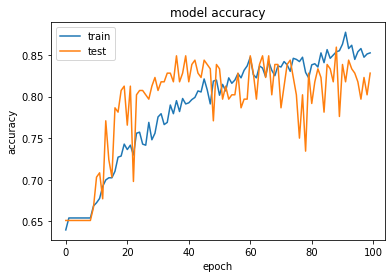

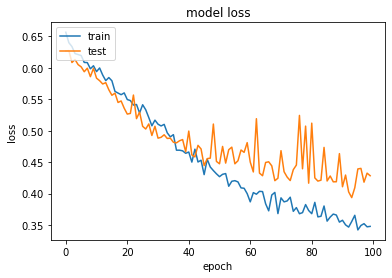

In [23]:
History=M.fit(X_train, Y_train, epochs=100, batch_size=1, validation_data=(X_test,Y_test))
Show_History(History)